# Solving Overdetermined Systems

## Approach
- Normalize data
- Cluster to number of variables (in this code, number of variables is 3)
- Find solution to system of three equations from cluster
- Find solution algebraically
- Compare solutions and see how they differ

In [23]:
# Imports

import csv
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

## Creating Data
* `readcsv`: Takes in a csv file and imports that data
    * Input: a filename (e.g. "testdata.csv")
    * Output: a matrix where each row represents an equation
* `makedataNum`: Takes in a number of clusters and generates a random number of equations, with the equations clustered in the specified number of groups. Equations are stored in a matrix.
    * Input: a natural number with the number of clusters
    * Output: a matrix where each row represents an equation
* `makedataRandom`: Takes in a number of equations, and generates that number of equations randomly. Equations are stored in a matrix.
    * Input: a natural number with the number of equations
    * Output: a matrix where each row represents an equation

In [24]:
# Get data from a csv file
def readcsv(filename):
    matrix = []
    
    with open(filename) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            matrix += [row]
    return np.array(matrix).astype(float)

In [25]:
# Get three dimensional planes
def makedataNum(numclusters):
    matrix = []
    for i in range(numclusters):
        numpoints = random.randint(5,20)
        offsetx = random.uniform(10, 40) * (math.pow(-1, random.randint(0,2)))
        offsety = random.uniform(10, 40) * (math.pow(-1, random.randint(0,2)))
        offsetz = random.uniform(10, 40) * (math.pow(-1, random.randint(0,2)))
        constant = random.uniform(0, 20) * (math.pow(-1, random.randint(0,2)))
        for j in range(numpoints):
            x = random.random() + offsetx
            y = random.random() + offsety
            z = random.random() + offsetz
            c = random.random() + constant
            multiplier = random.uniform(0,10)
            row = list(map(lambda x: x * multiplier, [x, y, z, c]))
            matrix += [row]
    return np.array(matrix)

In [26]:
def makedataRandom(numequations):
    matrix = []
    for j in range(numequations):
        x = random.uniform(0, 40) * (math.pow(-1, random.randint(0,2)))
        y = random.uniform(0, 40) * (math.pow(-1, random.randint(0,2)))
        z = random.uniform(0, 40) * (math.pow(-1, random.randint(0,2)))
        constant = random.uniform(0, 20) * (math.pow(-1, random.randint(0,2)))
        multiplier = random.uniform(0,10)
        row = list(map(lambda x: x * multiplier, [x, y, z, c]))
        matrix += [row]
    return np.array(matrix)

## Normalizing Data
* `normalize`: Use the L2 norm to normalize the data to make every equation in a matrix have a unit normal
    * Input: matrix with rows as equations
    * Output: matrix with each row having equations with unit norms
* `normalizeL1`: Use the L1 norm to normalize the data to make every equation in a matrix have a unit normal
    * Input: matrix with rows as equations
    * Output: matrix with each row having equations with unit norms

In [27]:
"""Input: matrix with rows as equations"""
def normalize(matrix):
    normMatrix = []
    for i in range(len(matrix)):
        vector = np.array(matrix[i][:(len(matrix[i]) - 1)])
        norm = np.linalg.norm(vector)        
        normVector = matrix[i] / norm
        normMatrix += [normVector]
    return np.array(normMatrix)

In [28]:
"""Input: matrix with rows as equations"""
def normalizeL1(matrix):
    normMatrix = []
    for i in range(len(matrix)):
        vector = np.array(matrix[i][:(len(matrix[i]) - 1)])
        norm = 0
        for a in vector:
            norm += np.abs(a)
        normVector = matrix[i] / norm
        normMatrix += [normVector]
    return np.array(normMatrix)

## Clustering Data Points
* Overall approach: Use k-means clustering
* To find the actual optimal cluster of k, plot the sum squared errors with each k, and find an "elbow" in the graph. The location of that elbow indicates what k we should cluster with

### Functions
* `bestkcluster`: Plots a graph of the sum squared errors clustering with different values of k
    * Input: a matrix of equations `matrix`, the maximum number of clusters to test `maxclusters`
* `kcluster`: Cluster the equations of the system into a specified number of clusters
    * Input: matrix of equations `matrix`, the number of clusters `k`
    * Output: matrix of equations representing the center of the clusters

In [29]:
# Plot sum of squared errors for k means clustering
# for each k <= maxclusters
# Elbow of graph = optimal number of clusters
def bestkcluster(matrix, maxclusters):
    sse = [] # sum of squared distances for each k
    for k in range(1, maxclusters+1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(matrix)
        centers = kmeans.cluster_centers_
        sse += [sum(np.min(cdist(matrix, centers, 'euclidean'), axis=1)) / matrix.shape[0]]
    plt.plot(list(range(1,maxclusters+1)), sse)
    plt.show()
    
# Find the clusters for k means clustering for a
# given k. Use bestkcluster to find optimal k
def kcluster(matrix, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(matrix)
    return kmeans.cluster_centers_

## Finding Solutions

* `algsolution`: Algebraically finds the solution to the system of equations
    * Input: matrix with rows of the form ax + by + cz = d
    * Output: Solution as (x, y, z)
* `solution`: Solves the system of equations when the system is not overdetermined
    * Input: matrix with rows of the form ax + by + cz = d, and number of rows are one less then the number of columns
    * Output: Solution as (x, y, z)
* `avgsolution`: Take all subsets of an overdetermined system that together gives a solution, then averages among the solutions
    * Input: matrix with rows of the form ax + by + cz = d
    * Output: Solution as (x, y, z)

In [30]:
def algsolution(matrix):
    
    # Equation of the form Ax = b
    A = matrix[:, 0:3]
    b = matrix[:, 3]
    
    # Estimate x = (A.T A)^-1 (A.T y) = B^-1 c
    # for B = (A.T A) and c = A.T y
    B = np.dot(np.transpose(A), A)
    c = np.dot(np.transpose(A), b)
    x = np.dot(np.linalg.inv(B), c)
    return x

In [31]:
def solution(matrix):
    if len(matrix) != len(matrix[0]) - 1:
        print("Overdetermined system")
    coefficients = [matrix[0][:len(matrix[0])-1], matrix[1][:len(matrix[1])-1], matrix[2][:len(matrix[2])-1]]
    consts = [matrix[0][len(matrix[0])-1], matrix[1][len(matrix[1])-1], matrix[2][len(matrix[2])-1]]
    return np.linalg.solve(coefficients, consts)

In [32]:
def avgsolution(matrix):
    solutions = []
    totalx = 0
    totaly = 0
    totalz = 0
    for i in range(len(matrix)-2):
        for j in range(i+1, len(matrix)-1):
            for k in range(j+1, len(matrix)):
                coefficients = [matrix[i][:len(matrix[i])-1], matrix[j][:len(matrix[j])-1], matrix[k][:len(matrix[k])-1]]
                consts = [matrix[i][len(matrix[i])-1], matrix[j][len(matrix[j])-1], matrix[k][len(matrix[k])-1]]
                sol = np.linalg.solve(coefficients, consts)
                solutions += [sol]
                totalx += sol[0]
                totaly += sol[1]
                totalz += sol[2]
    numsolutions = len(solutions)
    print(np.array(solutions))
    return (totalx / numsolutions, totaly / numsolutions, totalz / numsolutions)

## Graphing

* `graphVectors`: graphs a set of unit vectors for each planar equation in a matrix
    * Input: matrix with rows being normalized planar equations
* `graph`: graphs all planes in a matrix in one plot
    * Input: matrix with rows being planar equations
* `graphwithpoints`: graphs planes in a matrix and two points in one plot
    * Input: matrix with rows being planar equations `equations`, algebraic solution `algpoint`, and geometric solution `geopoint`

In [33]:
# Input: normalized matrix (see normalize function)
# Draws 3D vectors
def graphVectors(nmatrix):
    U = []
    V = []
    W = []
    for i in range(len(nmatrix)):
        U += [nmatrix[i][0]]
        V += [nmatrix[i][1]]
        W += [nmatrix[i][2]]
    
    origin = [0], [0], [0]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(*origin, U, V, W)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_zlim(-1.1, 1.1)
    ax.plot3D(*origin, 'ro')
    plt.draw()
    plt.show()

In [34]:
# Graph a set of planes ax + by + cz = d
# Input: Equations with each row being [x,y,z,c]
def graph(equations):
    xx, yy = np.meshgrid(range(-10,10), range(-10,10))
    plt3D = plt.figure().gca(projection='3d')
    for c in equations:
        z = (c[3] - (c[0] * xx) - (c[1] * yy)) / (c[2])
        plt3D.plot_surface(xx, yy, z)
    plt.show()

In [35]:
# Graph a set of planes and the solutions
def graphwithpoints(equations, algpoint, geopoint):
    xx, yy = np.meshgrid(range(-10,10), range(-10,10))
    plt3D = plt.figure().gca(projection='3d')
    for c in equations:
        z = (c[3] - (c[0] * xx) - (c[1] * yy)) / (c[2])
        plt3D.plot_surface(xx, yy, z)
    plt3D.plot3D([algpoint[0]], [algpoint[1]], [algpoint[2]], 'ro')
    plt3D.plot3D([geopoint[0]], [geopoint[1]], [geopoint[2]], 'bo')
    plt3D.set_xlim(-10,10)
    plt3D.set_ylim(-10,10)
    plt.show()

## Parameters
* In cell below...
    * Can adjust `numequations` parameter below
    * Can load data as needed using `readcsv`, `makedataNum`, or `makedataRandom`

In [36]:
# Create data
numequations = 1000
data = makedataNum(numequations)

## Run Script
Go through all of the steps to determine the algebraic and geometric solutions, and compare the two solutions

Normal Vectors:


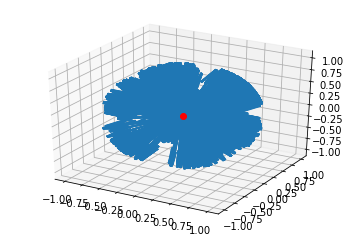

Sum of Squared Errors for each k


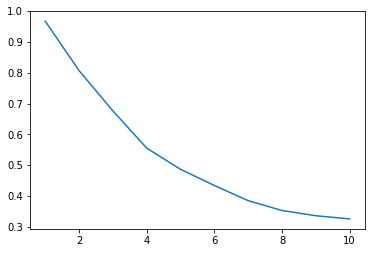

Clusters found with k = 3:
0.1401513489700587x + 0.4557409599775676y + -0.565093577104301z = 0.06823582293533823
0.20450958856316112x + -0.5692255609886652y + 0.2644175445854013z = 0.08936397533130754
0.19062664057082976x + 0.5543460831694306y + 0.55935510594954z = 0.07304840250569064


Graph of planes from clusters:


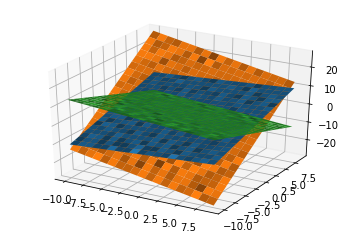

Geometric Solution:
[ 0.44238548 -0.00508272 -0.01513255]


Algebraic Solution
[0.05639795 0.0224658  0.02718713]


Algebraic (Red) and Geometric (Blue) Solution plot


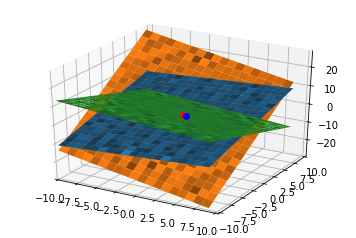

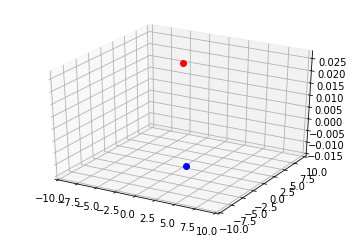

Component-wise error: [0.38598753 0.02754853 0.04231968]
Distance of error: 0.3892765698150919


In [37]:
# RUN SCRIPT
data = normalize(data)
print("Normal Vectors:")
graphVectors(data)
    
print("Sum of Squared Errors for each k")
bestkcluster(data, 10)
    
# Always force cluster to 3
cluster = kcluster(data, 3)
print("Clusters found with k = 3:")
for c in cluster:
    print(str(c[0]) + "x + " + str(c[1]) +"y + " + str(c[2]) + "z = " + str(c[3]))
print("\n")

print("Graph of planes from clusters:")
graph(cluster)
print("Geometric Solution:")
geo = solution(cluster)
print(geo)

print("\n")
print("Algebraic Solution")
alg = algsolution(data)
print(alg)
print("\n")

print("Algebraic (Red) and Geometric (Blue) Solution plot")
graphwithpoints(cluster, alg, geo)
graphwithpoints([], alg, geo)

error = np.array([np.abs(alg[0] - geo[0]), np.abs(alg[1] - geo[1]), np.abs(alg[2] - geo[2])])
print("Component-wise error: " + str(error))
sse = np.sum(error**2)**.5
print("Distance of error: " + str(sse))